## Areal under kurve. Tilnærmingsmetoder for bestemt integral

Det bestemet integralet av en funksjon er arealet under kurven mellom to angitte x-verdier. For polynomer har vi sett hvordan vi finner det ubestemte integralet. En del andre integraler kan også finnes ved help av tilgjengelige funksjoner i for eksempel modulen sympy (Symbolsk matematikk). I andre tilfeller er det veldig vanskelig å finne den antideriverte (ingtegralet). I de tilfellene må man bruke numeriske løsninger.

Tilnærmingsmetoden vi skal bruke er kjent fra matematikken som rektangelmetoden. Den går ut på å sette et antall rektangler tett i tett under kurven mellom de to angitte gensene. Summen av arealene av rektanglene (Riemansummen) blir en tilnærming av arealet under kurven. Når rektanglene blir smale og antallet av dem dermed øker blir resultet mer presis.  

Dette kan illustreres med søylediagram under kurven i det aktuelle området.

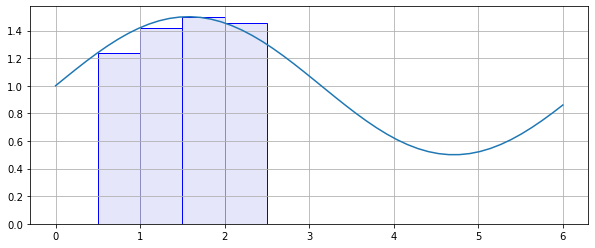

In [33]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 4] # Dette er for å få en større figur

x = np.linspace(0, 6, 50)
y = 1/2* np.sin(x) + 1 # funksjonen
plt.plot (x, y) # plott av kurven

x2 = np.linspace(0.5, 2.5, 4, endpoint=False) # 4 rektangler
y2 = 1/2* np.sin(x2) + 1  # samme funksjon
plt.bar(x2+.25,y2, width = 0.5, color='lavender',  edgecolor='blue') # plott av rektanglene
plt.grid()
plt.show()

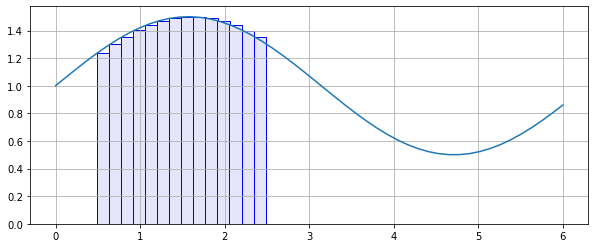

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 4] # Dette er for å få en større figur

x = np.linspace(0, 6, 50)
y = 1/2* np.sin(x) + 1 # funksjonen
plt.plot (x, y) # plott av kurven

x2 = np.linspace(0.5, 2.5, 14, endpoint=False) # 14 rektangler
y2 = 1/2* np.sin(x2) + 1  # samme funksjon
plt.bar(x2+.06,y2, width = 0.15, color='lavender',  edgecolor='blue') # plott av rektanglene
plt.grid()
plt.show()

Figurene over viser hvordan en venstretilnærming av rektangelsum vil kunne se ut. Da er høyden på rektanglene lik funksjonsverdien for x-verdien til venstre side. Vi kan tilsvarende ha en høyre- eller midt-tilnærming der høyden er funksjonsverdien til henholdsvis høyre side eller midten av rektanglene.  

Når vi skal regne ut arealet må vi være nøyaktig for å få riktig resultat. Det må hverken være overlapp eller gap mellom rektanglene. Når vi skal finne integralet fra a til b må vi passe på at venstre side av første rektangel er i a og at høyre side av siste rektangel er i b.

For å lage en løsning trenger vi tre verdier i tillegg til den funksjonen som vi skal bruke. Det er start og sluttpunktene langs x-aksen (***a*** og ***b***) som angir intervallet. Og så er det antall rektangler (***n***) intervallet skal deles inn i.  

Med disse tre parametrene må vi så regne ut bredden på rektanglene: ```delta_x = (a-b)/n```.

#### Pythonprogram som beregner venstre rektangelsum

I Python bruker vi en for-løkke som beregner arealet for ett og ett rektangel og legger det til Integralet (***I***). Vi må derfor passe på å nullstille ***I*** før for-løkka. Vi må også sette at ***x***, som er venstre side av hvert rektangel, starter i ***a***.  

Vi kan bruke ```range(n)``` for å sette opp antall ganger løkka skal kjøre og får ```for i = range (n)```. Innholdet i lista som settes opp av range er ikke viktig da vi ikke trenger å bruke tellevariabelen *i*. Det er bare antallet som må være likt antall rektangler.

Arealet av hvert rektangel blir funksjonsverdien av *x* gange bredden. Etter at vi har gjort beregningen må vi også passe på å inkrementere (øke) *x* med bredden *delta_x* i for-løkka for å være klar til neste runde.  

Som eksempel skal vi beregne integralet av ```cos(x)``` mellom ***0*** og ***1***. Vi får da følgende Pythonprogram:

In [35]:
# Program som beregner integralet av cos(x) mellom 0 og 1
import numpy as np

# Startverdier
a = 0.0 # fra-verdi
b = 1.0 # til-verdi
n = 10  # antall rektangler

delta_x = (b-a)/n
I = 0.0
x = a
for i in range(n):
    I += np.cos(x)*delta_x
    x += delta_x 
print(I)

0.8637545267950129


Dette fungerer, men ble lite fleksibelt. Vi legger beregningen i en funksjon vi kaller **rektangelsumV()** (Venstre rektangeslsum). Den skal så returnere resultatet. Beregningen av funksjonsverdien kan vi legge i en egne funksjon **f()** slik at det er lettere å oppdatere når vi vil beregne integralet av en annen funksjon. I hovedprogrammet har vi da innlesing av de aktuelle verdiene, kall til **rektangelsumV()** og utskrift av resultatet. Det hele legger vi i en programløkke.

In [40]:
# Program som  beregner integralet av funksjon cos(x) 
# mellom grensene a og b ved hjelp av rektangelsum

import numpy as np
def f(x): # En funksjon som returnerer en funksjonsverdi
    return np.cos(x) # Erstatt funksjonen med den du vil bruke

def rektangelsumV(a,b,n):    # En funktion som beregner et integral
    delta_x = (b-a)/n
    I = 0.0
    x = a
    for i in range(n):
        I += f(x)*delta_x
        x += delta_x 
    return I

enGangTil = 'J' # initialisering 
while enGangTil == 'J':
    venstre = float(input('Venstre grense (a):'))
    hoyre = float(input('Høyre grense (b):'))
    antall = int(input('Antall :'))

    integral = rektangelsumV(venstre, hoyre, antall)
    
    print('Integralet av funksjonen cos(x) mellom ', venstre,  'og', 
         hoyre, 'er', integral)

    igjen = input('Vil du kjøre en gang til (j/n): ') 
    enGangTil = igjen.upper()

Beregner integralet av funksjon cos(x) mellom
grensene a og b ved hjelp av rektangelsum


Venstre grense (a): 0
Høyre grense (b): 1
Antall : 10


Integralet av funksjonen cos(x) mellom  0.0 og 1.0 er 0.8637545267950129


Vil du kjøre en gang til (j/n):  n


Det ble mye bedre, men fortsatt må vi oppdatere både i *f()*, kommentaren og utskriften hvis vi skal endre hvilken funksjon vi skal beregne intgralet av.  

Nå har Python en kraftig funksjon som vi ikke har sett på enda som kan hjelpe oss

#### Funkajonen eval()

Python har en veldig kraftig funksjon som heter ```eval()```. Det den gjør er å utføre innholdet av en streng som om det var programkode. Da kan vi lese inn funksjonen til en streng og sette den der vi vil ha beregnet funksjonsverdien. Vi må bare passe på å skrive funksjonen slik vi vil gjøre i Python.

In [1]:
# Program som  beregner integralet av en oppgitt funksjon
# mellom grensene a og b ved hjelp av venstre rektangelsum
# funksjonen oppgis slik den skrives i Python.
# Pass på å bruke x som parameter. Dersom den bruker funksjoner eller 
# konstanter som hører til numpy må du skrive np. foran. For eksempel:
# x | x**2 | 2 * np.pi * x**2 | np.cos(x * np.pi/180 | np.exp(x**2)

import numpy as np

def fEv(x, funk): # En funksjon som returnerer en funksjonsverdi
    # for uttrykket i funk
    return eval(funk) 

def rektangelsumV2(a,b,n,funksjon):     # En funksjon som beregner et integral
                                        # ved hjelp av venstre rektangelsum
    delta_x = (b-a)/n # bredden av hvert rektangel
    I = 0.0     # det samla integralet
    x = a       # starter på x = a
    for i in range(n):  # setter opp antall ganger løkka skal kjøre
                        # = antall rektangler n
            # husk at x er venstre side av rektangelet
        I += fEv(x, funksjon)*delta_x # areal av hvert rektangel, legges til I
        x += delta_x  # oppdaterer x for neste rektangel
    return I

enGangTil = 'J' # initialisering 
while enGangTil == 'J':
    venstre = float(input('Venstre grense (a):'))
    hoyre = float(input('Høyre grense (b):'))
    antall = int(input('Antall :'))
    funksjonen = input('Funksjonen:')
    
    integral = rektangelsumV2(venstre, hoyre, antall, funksjonen)
    
    print('Integralet av funksjonen', funksjonen, 'mellom ', venstre,  'og', 
         hoyre, 'er', integral)

    igjen = input('Vil du kjøre en gang til (j/n): ') 
    enGangTil = igjen.upper()

Venstre grense (a): 1
Høyre grense (b): 2
Antall : 100
Funksjonen: x**3


Integralet av funksjonen x**3 mellom  1.0 og 2.0 er 3.7150750000000037


Vil du kjøre en gang til (j/n):  n


Hvis man vil ha høyre- eller midt-tilnærming må man ha et tilleg til ***x*** i kallet til fEv(). 